## Bike Sharing Case Study



##### The steps I will follow in this case study are as follows:
1. Reading, understanding and visualising the data.
2. preparing the data for modelling(train-test split, rescaling etc.)
3. Training the model 
4. Residual analysis
5. Predictions and evaluation on the test set

# Step 1: Reading and Understanding the Data
Let us first import NumPy and Pandas and read the housing dataset



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', 40)


In [3]:
# read the data 
boombikers= pd.read_csv("day.csv")

In [4]:
boombikers.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
boombikers.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
boombikers.shape

(730, 16)

In [7]:
boombikers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
boombikers['dteday'] = pd.to_datetime(boombikers['dteday'])

In [9]:
boombikers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null datetime64[ns]
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: datetime64[ns](1), float64(4), int64(11)
memory usage: 91.4 KB


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where i will also identify if some predictors directly have a strong association with the outcome variable



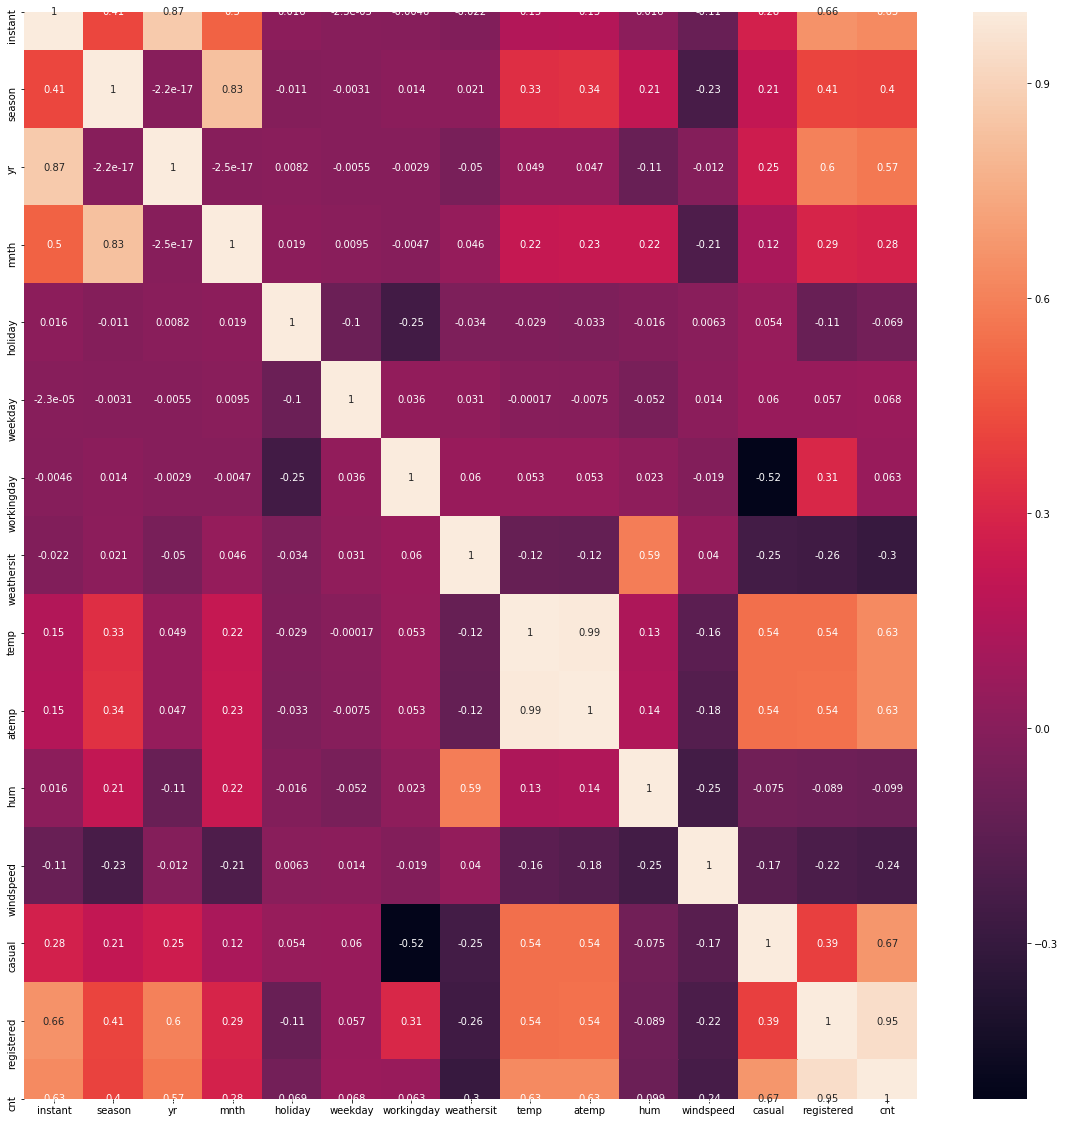

In [10]:
# Checking the coorelations between the variables
plt.figure(figsize=(20,20))
sns.heatmap(boombikers.corr(), annot= True)

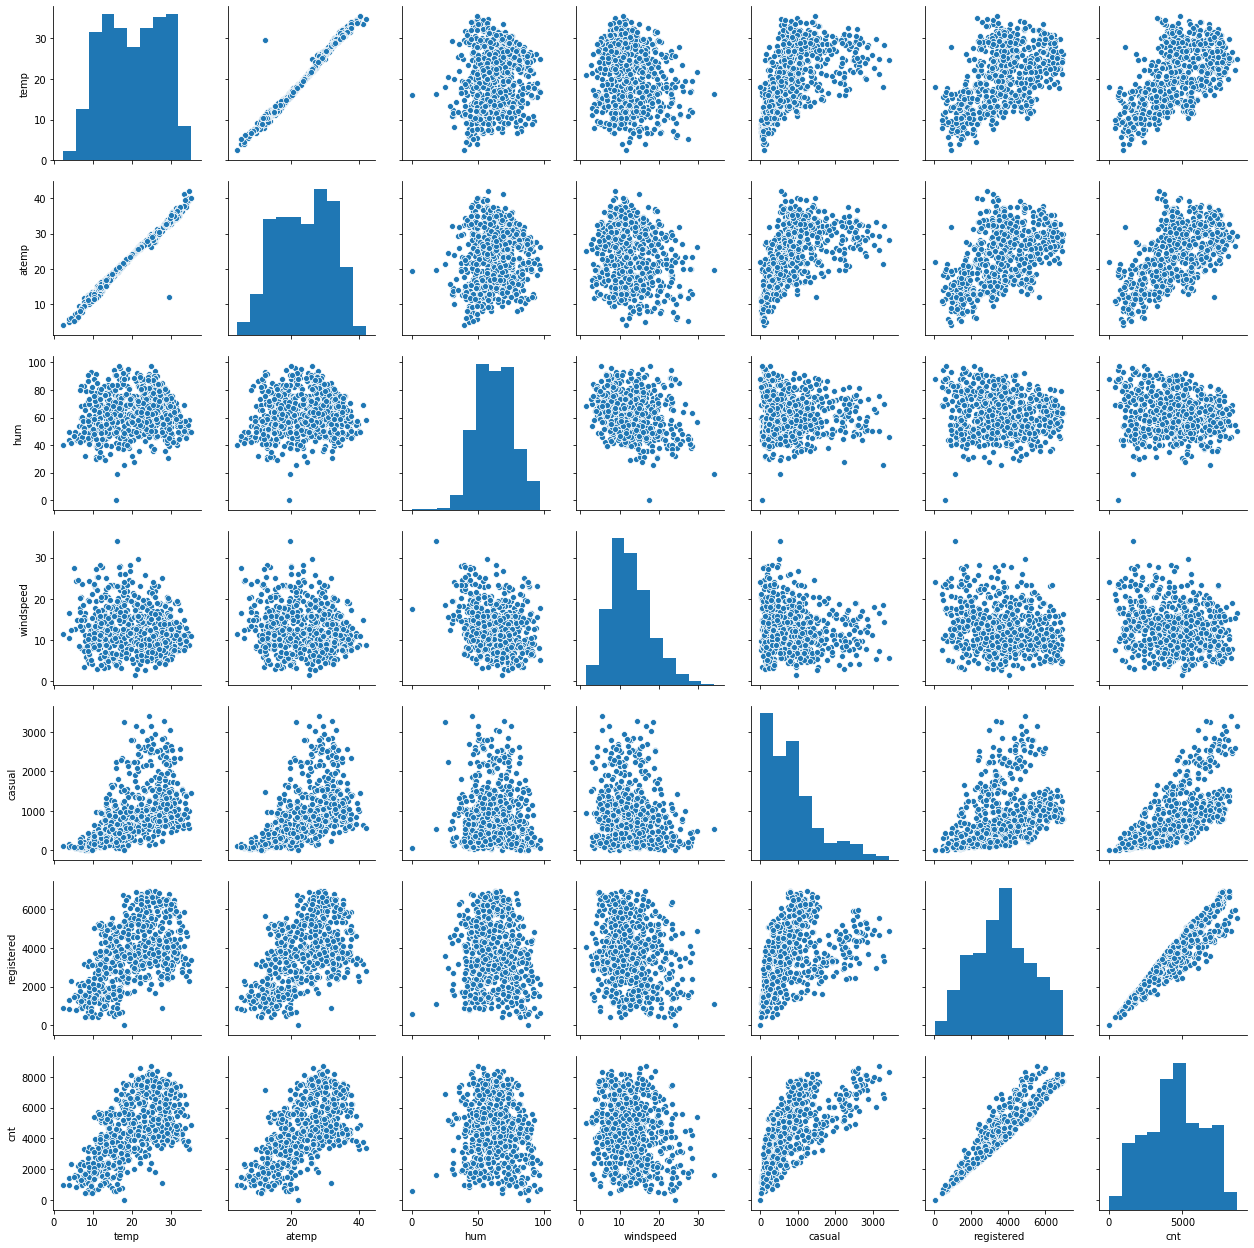

In [11]:
# Visualising Numeric Variables using pairplot 

num_var=boombikers[['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']]
sns.pairplot(num_var)
plt.show()

#### Inference from above visualisation

1. temp and atemp are highly correlated variables
2. As the temperature increases the number of users/ demand for bikes on rent will also increase


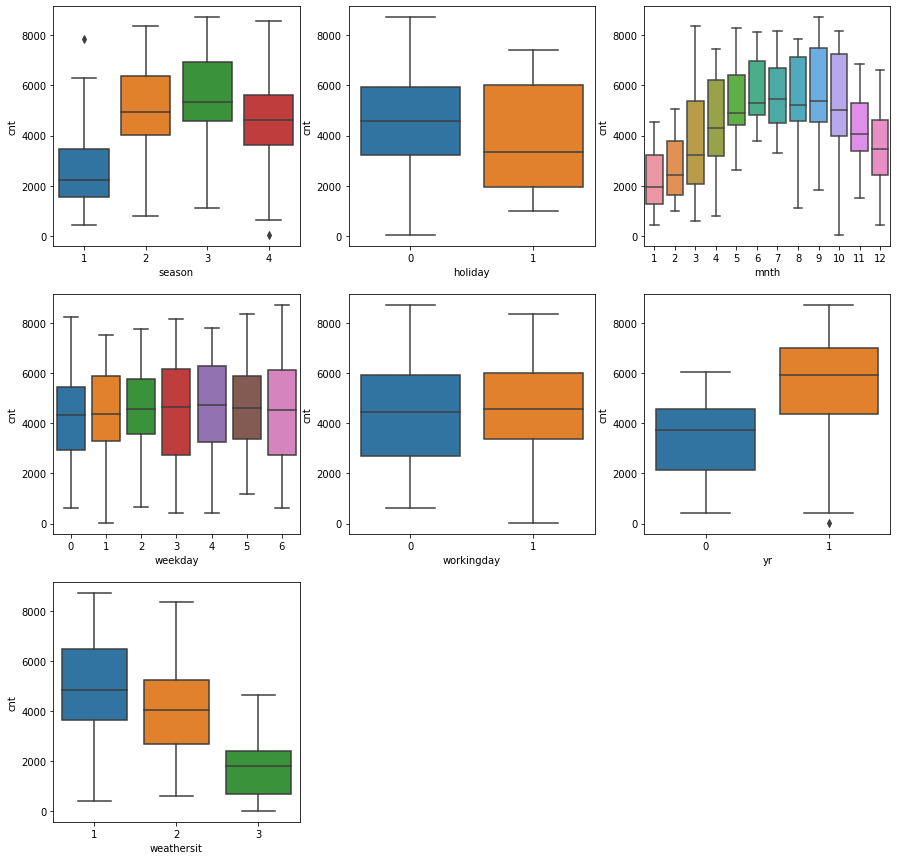

In [12]:
#loop for many cate data
plt.figure(figsize=(15,15))
cat_var=['season','holiday','mnth','weekday', 'workingday', 'yr','weathersit']
for i in enumerate(cat_var):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x= i[1], y= 'cnt', data= boombikers)

#### Inference from above visualisation

1. Season : Demand is more during the Summer and Fall seasons 
2. On workings day ,bikers are rented more as compared to holidays
3. Month : Users are riding bikes mainly in between march and september (3-7 month) which coincides with the higher demand in Summer and Fall seasons
4. The day of week does not have much impact on rented bikes.
5. in year 2019 the more bikes are on rent as compared to 2018 
6. Weather situation also plays an important part for riding bikes when its Clear, Few clouds, Partly cloudy, Partly cloudy wetaher.


## Step 3: Data Preparation

### 3.1 Identify Categorical and Continuous variables

1. Categorical Columns : season , year , month , holiday , weekday , workingday , weathersit
2. Continuous Columns : temp , atemp , hum , windspeed , cnt
3. no useful columns : 'instant','dteday','casual','registered'

In [13]:
# drop columns which have no use instant dteday casual registered
boombikers=boombikers.drop(['instant','dteday','casual','registered'], axis=1)

In [14]:
boombikers.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
boombikers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
cnt           730 non-null int64
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


#  Dummies creation
`weekday` `mnth` `season` `weathersit`

### 3.2 Mapping the data types 

Categorical variables are mapped as :
1. weekday : day of the week ( 0: sunday , 1: monday , 2:tuesday , 3:wednesday , 4:thursday , 5:friday , 6:saturday  
2. mnth : month ( 1 to 12 = Jan to Dec)
3. season : season (1:spring, 2:summer, 3:fall, 4:winter)
4. weathersit : (used few word only)
		 a. 1: clear (Clear, Few clouds, Partly cloudy, Partly cloudy  ) 
		 b. 2:  Mist and Few clouds (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist )
		 c. 3 : Light Snow (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)
		 d. 4 : Heavy Rain  (Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog)

### Dummy creation 1: weekday

In [16]:
# first categorical column
varlist =  ['weekday']

# Defining the map function
def binary_map(x):
    return x.map({1: 'monday', 2: 'tuesday',3:'wednesday',4:'thursday',5:'friday', 6:'saturday',0:'sunday'})

# Applying the function to the housing list
boombikers[varlist] = boombikers[varlist].apply(binary_map)

### Dummy creation 1: mnth

In [17]:
# second categorical column
varlist =  ['mnth']

# Defining the map function
def binary_map(x):
    return x.map({1: 'jan', 2: 'feb',3:'march',4:'april',5:'may', 6:'june',7:'july',8:'aug',9:'sept',10:'oct',11:'nov',12:'dec'})

# Applying the function to the housing list
boombikers[varlist] = boombikers[varlist].apply(binary_map)

### Dummy creation 1: season

In [18]:
# third categorical column
varlist =  ['season']

# Defining the map function
def binary_map(x):
    return x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

# Applying the function to the housing list
boombikers[varlist] = boombikers[varlist].apply(binary_map)

### Dummy creation 1: weathersit

In [19]:
# forth categorical column
varlist =  ['weathersit']

# Defining the map function
def binary_map(x):
    return x.map({1:'Clear', 2:'Mist and Few clouds', 3:'Light Snow', 4:'Heavy Rain '})

# Applying the function to the housing list
boombikers[varlist] = boombikers[varlist].apply(binary_map)

In [20]:
# Get the dummy variables for the feature 'weathersit','season','mnth' and store it in a 
#new variable - 'status1','status2','status3',status4
status1= pd.get_dummies(boombikers['season'])
status2= pd.get_dummies(boombikers['mnth'])
status3= pd.get_dummies(boombikers['weekday'])
status4= pd.get_dummies(boombikers['weathersit'])


In [21]:
status1.head()

,fall,spring,summer,winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [22]:
# Let's drop the first column from status1 df using 'drop_first = True'

status1 = pd.get_dummies(boombikers['season'], drop_first = True)
status1

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
725,1,0,0
726,1,0,0
727,1,0,0
728,1,0,0


In [23]:
status2.head()

,april,aug,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [24]:
# Let's drop the first column from status2 df using 'drop_first = True'

status2 = pd.get_dummies(boombikers['mnth'], drop_first = True)
status2

,aug,dec,feb,jan,july,june,march,may,nov,oct,sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [25]:
status3.head()

,friday,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0
2,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1


In [26]:
# Let's drop the first column from status3 df using 'drop_first = True'

status3 = pd.get_dummies(boombikers['weekday'], drop_first = True)
status3

,monday,saturday,sunday,thursday,tuesday,wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
725,0,0,0,1,0,0
726,0,0,0,0,0,0
727,0,1,0,0,0,0
728,0,0,1,0,0,0


In [27]:
status4.head()

,Clear,Light Snow,Mist and Few clouds
0,0,0,1
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [28]:
# Let's drop the first column from status4 df using 'drop_first = True'

status4 = pd.get_dummies(boombikers['weathersit'], drop_first = True)
status4

,Light Snow,Mist and Few clouds
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [29]:
# Add the results to the original boombikers dataframe

boombikers = pd.concat([boombikers, status1,status2,status3,status4], axis = 1)

In [30]:
boombikers.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
0,spring,0,jan,0,saturday,0,Mist and Few clouds,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,spring,0,jan,0,sunday,0,Mist and Few clouds,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,spring,0,jan,0,monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,spring,0,jan,0,tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,spring,0,jan,0,wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [31]:
boombikers.shape

(730, 34)

In [32]:
boombikers=boombikers.drop(['season','mnth','weekday','weathersit'],axis=1)

In [33]:
boombikers.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
boombikers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
yr                     730 non-null int64
holiday                730 non-null int64
workingday             730 non-null int64
temp                   730 non-null float64
atemp                  730 non-null float64
hum                    730 non-null float64
windspeed              730 non-null float64
cnt                    730 non-null int64
spring                 730 non-null uint8
summer                 730 non-null uint8
winter                 730 non-null uint8
aug                    730 non-null uint8
dec                    730 non-null uint8
feb                    730 non-null uint8
jan                    730 non-null uint8
july                   730 non-null uint8
june                   730 non-null uint8
march                  730 non-null uint8
may                    730 non-null uint8
nov                    730 non-null uint8
oct                    730 non-null uint8
sept 

- again mapping back to numeric form

In [35]:
boombikers.shape

(730, 30)

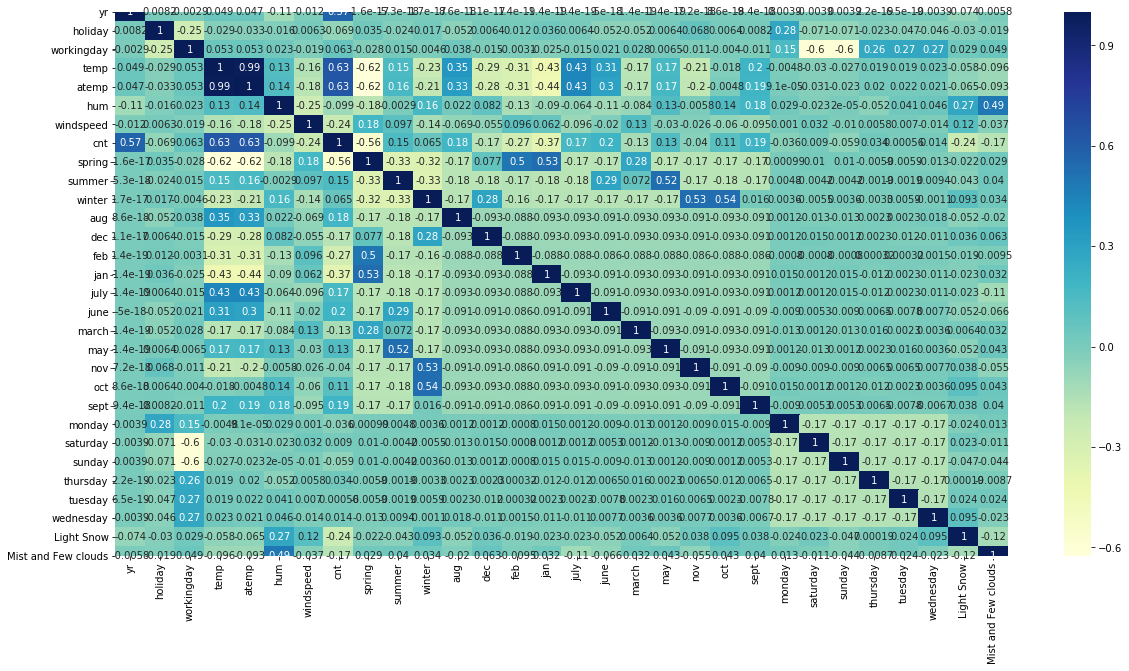

In [36]:
plt.figure(figsize=(20,10))
sns.heatmap(boombikers.corr(), cmap="YlGnBu", annot= True)

In [37]:
boombikers.shape

(730, 30)

# Step 4: RFE 

### 4.1 Using Mixed approach for buliding  Linear Regression model 

To create a good model we need to select the optimum and best features.
Feature selection can be done using 3 ways :
1. Automatic -- RFE (Recursive Feature Elimination) 
2. Manual -- VIF (Variance Inflation Factor) and p-value -- manually go through the various variables and eliminate variables which have a high p value / VIF
##### We could have :
    - high p-value, high VIF
    - High-low:
        - High p-value, low VIF :always remove this type of variables first
        - low p-value, High VIF : remove this type of variables latter i.e. after the ones above.
    - low p-value, low VIF
3. Mixed -- Automatic + Manual -- mixed approach of automatic (RFC) to reduce the number of variables and manual (p-value+VIF) enabling to build a good model

##### Mixed approach is considered for the below model building task

## Splitting the Data into Training and Testing Sets

In [38]:
from sklearn.model_selection import train_test_split
df_train,df_test= train_test_split(boombikers,  train_size=0.7, random_state=100 )

In [39]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


### Rescaling the Features 

We will use MinMax scaling.

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [41]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
# 	atemp	hum	windspeed	cnt
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [42]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,0.084314,0.086275,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,0.278131,0.281045,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
yr                     510 non-null int64
holiday                510 non-null int64
workingday             510 non-null int64
temp                   510 non-null float64
atemp                  510 non-null float64
hum                    510 non-null float64
windspeed              510 non-null float64
cnt                    510 non-null float64
spring                 510 non-null uint8
summer                 510 non-null uint8
winter                 510 non-null uint8
aug                    510 non-null uint8
dec                    510 non-null uint8
feb                    510 non-null uint8
jan                    510 non-null uint8
july                   510 non-null uint8
june                   510 non-null uint8
march                  510 non-null uint8
may                    510 non-null uint8
nov                    510 non-null uint8
oct                    510 non-null uint8
s

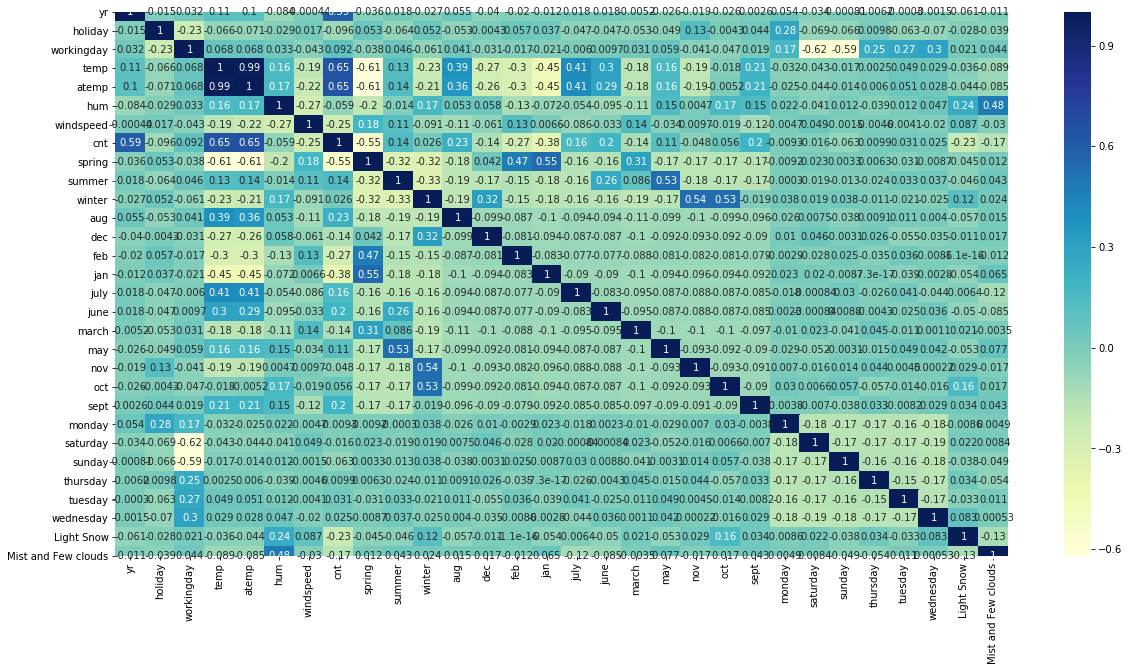

In [44]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

`yr`, `atemp`, `temp` are highly correlated to  `cnt`. Let's see a pairplot for them.

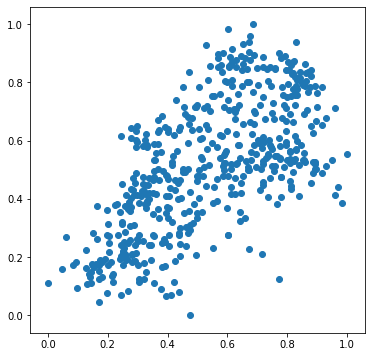

In [45]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

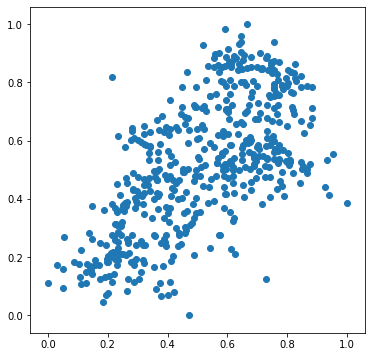

In [46]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.atemp, df_train.cnt)
plt.show()

### Dividing into X and Y sets for the model building

In [47]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model

This time, we will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

### RFE
Recursive feature elimination

In [48]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

In [49]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,aug,dec,feb,jan,july,june,march,may,nov,oct,sept,monday,saturday,sunday,thursday,tuesday,wednesday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
# Importing RFE and LinearRegression

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('march', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sept', True, 1),
 ('monday', False, 9),
 ('saturday', True, 1),
 ('sunday', False, 8),
 ('thursday', False, 11),
 ('tuesday', False, 10),
 ('wednesday', False, 12),
 ('Light Snow', True, 1),
 ('Mist and Few clouds', True, 1)]

In [53]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'jan', 'july', 'sept', 'saturday', 'Light Snow',
       'Mist and Few clouds'],
      dtype='object')

In [54]:
X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'march', 'may', 'nov', 'oct',
       'monday', 'sunday', 'thursday', 'tuesday', 'wednesday'],
      dtype='object')

In [55]:
X_train[col]

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,jan,july,sept,saturday,Light Snow,Mist and Few clouds
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,1,0,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.751824,0.380981,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0,0
53,0,0,1,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0,0
350,0,0,0,0.248216,0.577930,0.431816,0,0,1,0,0,0,1,0,1
79,0,0,1,0.462664,0.759870,0.529881,0,1,0,0,0,0,0,0,1


# Model 1

In [56]:
# Creating X_train dataframe with RFE selected variables
X_train_new = X_train[col]

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_new)

In [58]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        11:08:36   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2519    

In [60]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Mist and Few clouds,2.29
0,yr,2.09
12,saturday,1.98


# Model 2

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `jan` as it has a approx  p-value of `0.047` and very high VIF. Let's go ahead and drop this variables

In [61]:
X_train_new = X_train_new.drop(["jan"], axis = 1)

In [62]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [63]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.11e-191
Time:                        11:08:36   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2402    

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.46
3,temp,16.98
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.42
7,summer,2.85
13,Mist and Few clouds,2.29
0,yr,2.08
11,saturday,1.97


- R-squared:                       0.843
- Adj. R-squared:                  0.838

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `holiday ` as it has p value 0.029. Let's go ahead and drop this variables

# Model 3

In [65]:
X_train_new = X_train_new.drop(["holiday"], axis = 1)

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [67]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     208.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          1.54e-191
Time:                        11:08:37   Log-Likelihood:                 515.15
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     496   BIC:                            -943.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2307    

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,28.38
2,temp,16.88
1,workingday,4.72
4,windspeed,4.70
5,spring,4.18
7,winter,3.39
6,summer,2.84
12,Mist and Few clouds,2.28
0,yr,2.08
10,saturday,1.84


# Model 4

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `hum` as it has high vif value 28.38 . Let's go ahead and drop this variables

In [69]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [70]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [71]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          7.12e-189
Time:                        11:08:37   Log-Likelihood:                 506.01
No. Observations:                 510   AIC:                            -986.0
Df Residuals:                     497   BIC:                            -931.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1492    

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.73
1,workingday,4.66
3,windspeed,4.64
4,spring,2.38
5,summer,2.32
0,yr,2.07
6,winter,1.91
9,saturday,1.83
7,july,1.58
11,Mist and Few clouds,1.57


- The p-values of all variables in the above model are very low , hence we move over to `VIF value`.

# Model 5

### Dropping the variable and rebuilding the model

`temp` has a high VIF value of 6.73 however on dropping temp is not agood idea
Hence dropping the feature with the next highest VIF value -- `workingday`
As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `workingday` as it has high VIF 4.66 (cant drop temp as its an imp factor) . Let's go ahead and drop this variables

In [73]:
X_train_new = X_train_new.drop(["workingday"], axis = 1)

In [74]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [75]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     224.2
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          6.54e-185
Time:                        11:08:37   Log-Likelihood:                 493.80
No. Observations:                 510   AIC:                            -963.6
Df Residuals:                     498   BIC:                            -912.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1935    

In [76]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.12
2,windspeed,4.62
4,summer,2.23
3,spring,2.08
0,yr,2.07
5,winter,1.78
6,july,1.58
10,Mist and Few clouds,1.55
7,sept,1.33
8,saturday,1.18


# Model 6

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `saturday` as it has high p value 0.045 . Let's go ahead and drop this variables

In [77]:
X_train_new = X_train_new.drop(["saturday"], axis = 1)

In [78]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [79]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     244.8
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.00e-185
Time:                        11:08:38   Log-Likelihood:                 491.75
No. Observations:                 510   AIC:                            -961.5
Df Residuals:                     499   BIC:                            -914.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1974    

In [80]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.09
2,windspeed,4.60
4,summer,2.23
0,yr,2.07
3,spring,2.07
5,winter,1.77
6,july,1.58
9,Mist and Few clouds,1.55
7,sept,1.33
8,Light Snow,1.08


# Model 7

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `windspeed ` as it has high p value as compare to  others . Let's go ahead and drop this variables

In [81]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [82]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [83]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     251.3
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          3.15e-179
Time:                        11:08:38   Log-Likelihood:                 474.67
No. Observations:                 510   AIC:                            -929.3
Df Residuals:                     500   BIC:                            -887.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1474    

In [84]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.21
0,yr,2.06
3,summer,1.94
5,july,1.58
4,winter,1.56
8,Mist and Few clouds,1.55
2,spring,1.38
6,sept,1.33
7,Light Snow,1.06


# Model 8

### Dropping the variable and rebuilding the model

As i can see from the summary and the VIF dataframe, some variables are still insignificant. One of these variables is, `summer ` as it has high p value as compare to  others . Let's go ahead and drop this variables

In [85]:
X_train_new = X_train_new.drop(["summer"], axis = 1)

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

# Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()   

In [87]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     279.5
Date:                Mon, 20 Apr 2020   Prob (F-statistic):          2.70e-179
Time:                        11:08:39   Log-Likelihood:                 471.91
No. Observations:                 510   AIC:                            -925.8
Df Residuals:                     501   BIC:                            -887.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1928    

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,2.98
0,yr,2.05
7,Mist and Few clouds,1.51
4,july,1.33
3,winter,1.31
2,spring,1.23
5,sept,1.18
6,Light Snow,1.06


-  #### Model 8 is my final model as all the variables have p value =0.00  and vif<3

In [89]:
X_tarin_for_corr=pd.concat([X_train_new,y_train], axis=1)

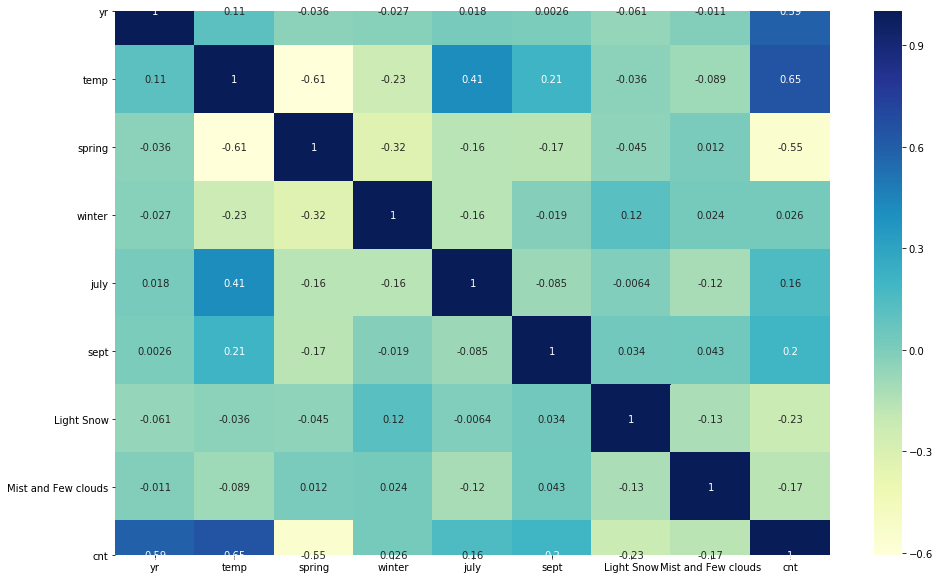

In [90]:
plt.figure(figsize=(16,10))
sns.heatmap(X_tarin_for_corr.corr(), annot= True, cmap="YlGnBu")
plt.show()

## Step 6: Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [91]:
y_train_cnt = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

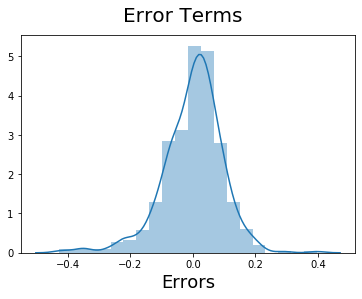

In [92]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

- #### The above normally distributed histogram with mean = 0 ,proves that the  assumption of error terms is correct 

## Step 7: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

#### Applying the scaling on the test sets

In [93]:
# Applying scaler() 
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

# 2. fitting on data
df_test[num_vars] = scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test

In [94]:
y_test = df_test.pop('cnt')
X_test = df_test

In [95]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [96]:
# Making predictions
y_pred = lm.predict(X_test_new)

In [97]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test, y_pred=y_pred)

0.8092270264746741

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

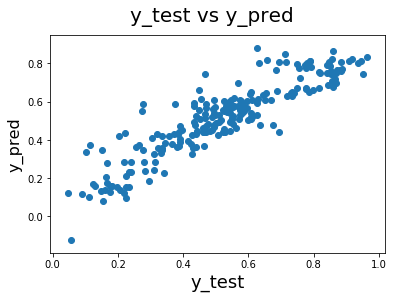

In [98]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred)

fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)   

In [101]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,y_pred)
MSE=metrics.mean_squared_error(y_test,y_pred)
RMSE= np.sqrt(MSE)

print("Mean Absolute Error", MAE)
print("Mean Squared Error", MSE)
print("Root Mean Squared Error",RMSE)

Mean Absolute Error 0.07296184473090395
Mean Squared Error 0.009121672278610079
Root Mean Squared Error 0.09550744619457731


- MAE : The lower the value, better is the model's performance.(7%)
- MSE: The lower the value, better is the model's performance.(1%)
- RMSE: In this metric also, lower the value, better is the performance of the model.(10%)

We can see that the equation of our best fitted line is:

$ cnt = 0.192 + 0.233  \times  yr + 0.470  \times  temp - 0.115 \times spring + 0.051 \times winter - 0.0680 \times july + 0.0617 \times sept - 0.295 \times Light Snow - 0.0764 \times Mist and Few clouds  $


###### Adjusted R square for Train model = 0.817 = 81.7%
###### Adjusted R square for Test model = 0.809 = 80.9%